# Exercise 9

## This question involves the use of multiple linear regression on the Auto data set. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline 

In [2]:
df = pd.read_csv('Auto.csv')

In [3]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors = 'coerce')
df = df.fillna(df.median())

## Produce a scatterplot matrix which includes all of the variables in the data set.

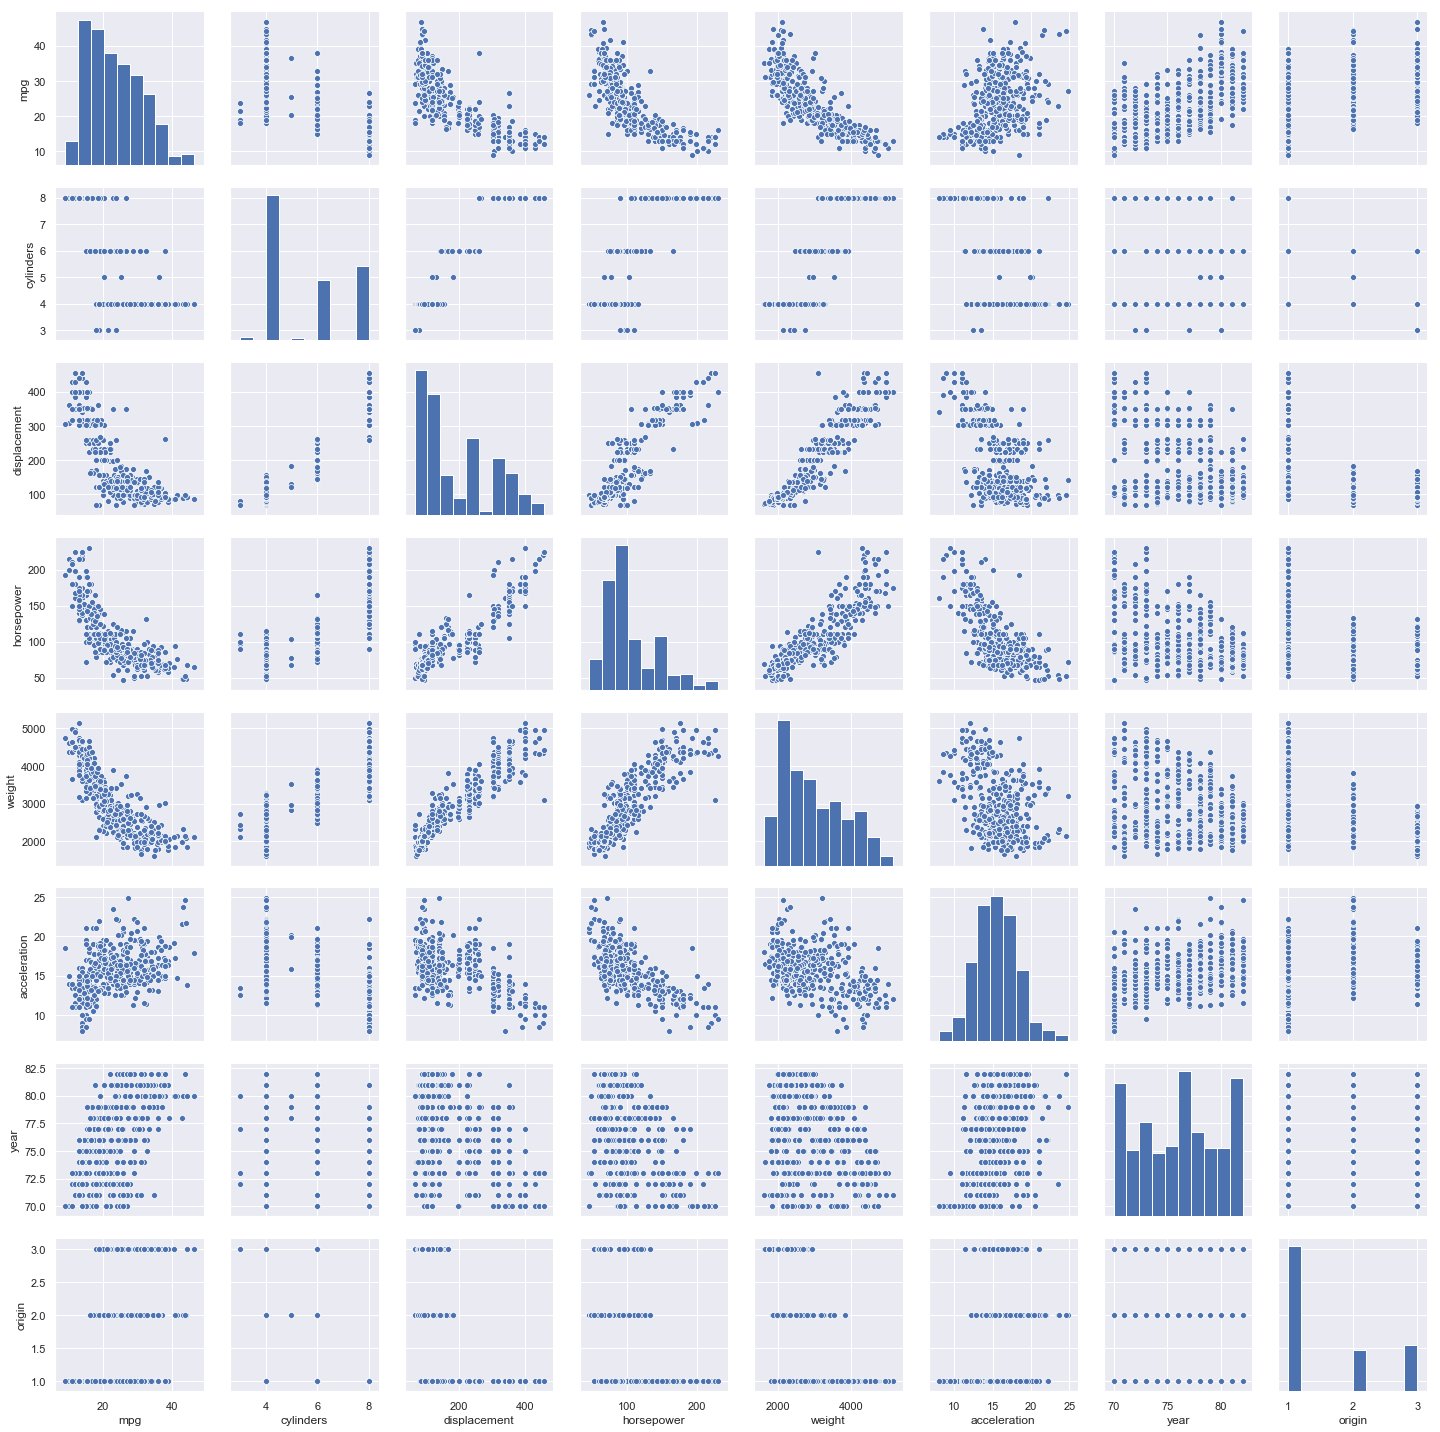

In [4]:
sns.pairplot(df)
plt.show()

## Compute the matrix of correlations between the variables using the function corr(). 

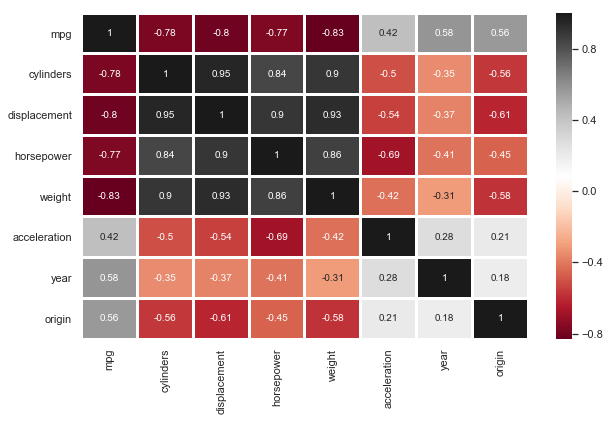

In [5]:
plt.subplots(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = 'RdGy')
plt.show()

## Use the statsmodels to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

### Is there a relationship between the predictors and the response?
### Which predictors appear to have a statistically significant relationship to the response?
### What does the coefficient for the year variable suggest?

In [6]:
import statsmodels.formula.api as smf
formula = 'mpg ~ ' + " + ".join(df.columns[1:-1])
results = smf.ols(formula, data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.1
Date:                Sat, 09 Mar 2019   Prob (F-statistic):          2.22e-141
Time:                        13:08:06   Log-Likelihood:                -1037.3
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.4740      4.621     -3.998      0.000     -27.559      -9.389
cylinders       -0.4498      0.323     -1.395      0.164      -1.084       0.184
displacement     0.0192      0.008      2.555      0.011       0.004       0.034
horsepower      -0.0110      0.014     -0.815      0.415      -0.038       0.016
weight          -0.0067      0.001    -10.410      0.000      -0.008      -0.005
acceleration     0.1108      0.097      1.137      0.256      -0.081       0.302
year             0.7611      0.051     15.031      0.000       0.662       0.861
origin           1.4057      0.276      5.093      0.000       0.863       1.948
==============================================================================
Omnibus:                       29.910   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.012
Skew:                           0.508   Prob(JB):                     3.75e-11
Kurtosis:                       4.367   Cond. No.                     8.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the p values in the table: cylinders, horsepower and acceleration are not significant in the presence of other variables.

Displacement is marginally significant. 

And weight, year, origin are highly significant. 

## Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

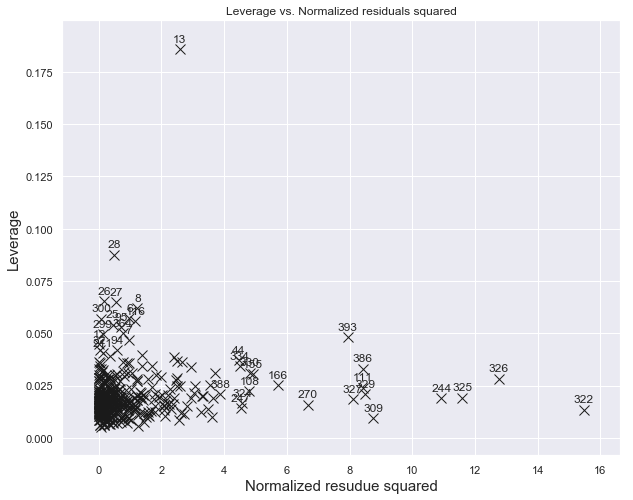

In [7]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize = (10,8))
fig = plot_leverage_resid2(results, ax = ax, marker = 'x', color = 'k', markersize = 10)
plt.xlabel('Normalized resudue squared', size = 15)
plt.ylabel('Leverage', size = 15)
plt.show()

This suggests that the point 13 is the outlier. 

## Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [8]:
from itertools import combinations

In [9]:
interactions_formula =  " + ".join([comb[0] + " * " + comb[1] for comb in combinations(df.columns[1:-1], 2)])
interactions_formula

'cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [10]:
formula = 'mpg ~ ' + " + ".join(df.columns[1:-1])
formula += ' + ' + interactions_formula

In [11]:
results = smf.ols(formula, data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 09 Mar 2019   Prob (F-statistic):          2.72e-157
Time:                        13:08:07   Log-Likelihood:                -943.01
No. Observations:                 397   AIC:                             1944.
Df Residuals:                     368   BIC:                             2060.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    38.7532     52.386      0.740      0.460     -64.261     141.767
cylinders                     7.0703      8.248      0.857      0.392      -9.149      23.289
displacement                 -0.4787      0.190     -2.526      0.012      -0.851      -0.106
horsepower                    0.4225      0.327      1.291      0.198      -0.221       1.066
weight                        0.0080      0.017      0.465      0.643      -0.026       0.042
acceleration                 -6.3414      2.091     -3.033      0.003     -10.453      -2.230
year                          0.6570      0.604      1.087      0.278      -0.531       1.845
origin                      -21.6496      7.109     -3.046      0.002     -35.628      -7.671
cylinders:displacement       -0.0055      0.006     -0.873      0.383      -0.018       0.007
cylinders:horsepower          0.0148      0.024      0.613      0.540      -0.033       0.062
cylinders:weight              0.0004      0.001      0.465      0.642      -0.001       0.002
cylinders:acceleration        0.2937      0.166      1.770      0.077      -0.033       0.620
cylinders:year               -0.1773      0.097     -1.824      0.069      -0.369       0.014
cylinders:origin              0.3160      0.492      0.642      0.521      -0.652       1.284
displacement:horsepower    -9.23e-05      0.000     -0.321      0.748      -0.001       0.000
displacement:weight         3.05e-05   1.44e-05      2.121      0.035    2.22e-06    5.88e-05
displacement:acceleration    -0.0040      0.003     -1.193      0.234      -0.011       0.003
displacement:year             0.0060      0.002      2.514      0.012       0.001       0.011
displacement:origin           0.0225      0.019      1.160      0.247      -0.016       0.061
horsepower:weight         -3.234e-05   2.88e-05     -1.124      0.262   -8.89e-05    2.42e-05
horsepower:acceleration      -0.0068      0.004     -1.821      0.069      -0.014       0.001
horsepower:year              -0.0044      0.004     -1.187      0.236      -0.012       0.003
horsepower:origin             0.0049      0.029      0.172      0.863      -0.051       0.061
weight:acceleration           0.0002      0.000      1.095      0.274      -0.000       0.001
weight:year                  -0.0003      0.000     -1.403      0.161      -0.001       0.000
weight:origin                -0.0004      0.002     -0.257      0.797      -0.003       0.003
acceleration:year             0.0618      0.025      2.498      0.013       0.013       0.110
acceleration:origin           0.4627      0.153      3.018      0.003       0.161       0.764
year:origin                   0.1459      0.074      1.978      0.049       0.001       0.291
===========================================================================

Looking at the p-values of the interaction terms, some of the interaction we can count are (acceleration * origin), (acceleration * year), (displacement * year), (year * origin) etc. But selection of the interaction should be done more systematically using either forward selection or the backward selection with the cross validation (or p-value check) in each step. The detail of it is presented in the later chapter. But the main reason we can not choose and reject all the interaction at once is that the singnificance of a variable in the presence of another variable might be different than that in the absence of that variable. So adding or removing the variable should be done one by one checking in each step. 

## Try a few different transformations of the variables, such as $log(X), sqrt(X), X^2 $ . Comment on your findings.

I instead used inverse looking at the scatterplot. Which significantly reduced the F value and inversed variables are p-value 0.

In [12]:
df['weight'] = df['weight'].astype(float)

In [13]:
formuls = 'mpg ~  cylinders + np.reciprocal(displacement) + np.reciprocal(horsepower) + np.reciprocal(weight) + acceleration + year + origin'

In [14]:
results_1 = smf.ols(formuls, data = df).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     339.2
Date:                Sat, 09 Mar 2019   Prob (F-statistic):          2.67e-161
Time:                        13:08:07   Log-Likelihood:                -990.42
No. Observations:                 397   AIC:                             1997.
Df Residuals:                     389   BIC:                             2029.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -51.8738      4.452    -11.653      0.000     -60.626     -43.122
cylinders                      -0.1120      0.204     -0.550      0.583      -0.513       0.288
np.reciprocal(displacement)    81.4317    166.984      0.488      0.626    -246.872     409.735
np.reciprocal(horsepower)     564.4684    123.680      4.564      0.000     321.303     807.634
np.reciprocal(weight)        3.677e+04   5454.082      6.742      0.000     2.6e+04    4.75e+04
acceleration                   -0.2070      0.091     -2.279      0.023      -0.386      -0.028
year                            0.7662      0.044     17.260      0.000       0.679       0.853
origin                          0.6215      0.267      2.325      0.021       0.096       1.147
==============================================================================
Omnibus:                       38.676   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.721
Skew:                           0.552   Prob(JB):                     1.33e-17
Kurtosis:                       4.865   Cond. No.                     2.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The reciprocal of weight and horse power are very significant. The reciprocal of displacement is not significant. Also in the presence of these reciprocated variables the cylinders variable is also not significant. If the model selection is done properly by forward propagation it might produce the better model than the one from original variable. 

## Alternately scikit learn also can be used to perform the same task other than the statsmodel. One might be better than the other depending on the task. 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
LR = LinearRegression()

In [17]:
X = df.drop(columns = ['name', 'mpg'])
y = df['mpg']

LR.fit(X, y)
LR.intercept_, LR.coef_

(-18.474039368647297,
 array([-0.44983357,  0.01918346, -0.0110079 , -0.00669786,  0.11083624,
         0.76108151,  1.40573112]))

In [18]:
y_pred = LR.predict(X)
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

0.8217011201126685
10.892089955091901


## Interaction can be handled in scikit learn through the use of PolynomailFeatures() in combination with pipeline in more convenient way. Let's look at it how it is done. 

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [26]:
poly = PolynomialFeatures(interaction_only = False, include_bias = False)
X_mod = poly.fit_transform(X)

In [27]:
np.shape(X_mod)

(397, 35)

In [32]:
model = make_pipeline(poly, LR)
model.fit(X, y)
# model.intercept_, model.coef_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [34]:
y_pred_intrcn = model.predict(X)
print(r2_score(y, y_pred_intrcn))
print(mean_squared_error(y, y_pred_intrcn))

0.8951622386688904
6.40442793488371


The mean squared error have been lowered by the presence of the interaction terms. Also the correlation of the observed and predicted value have been increased. 

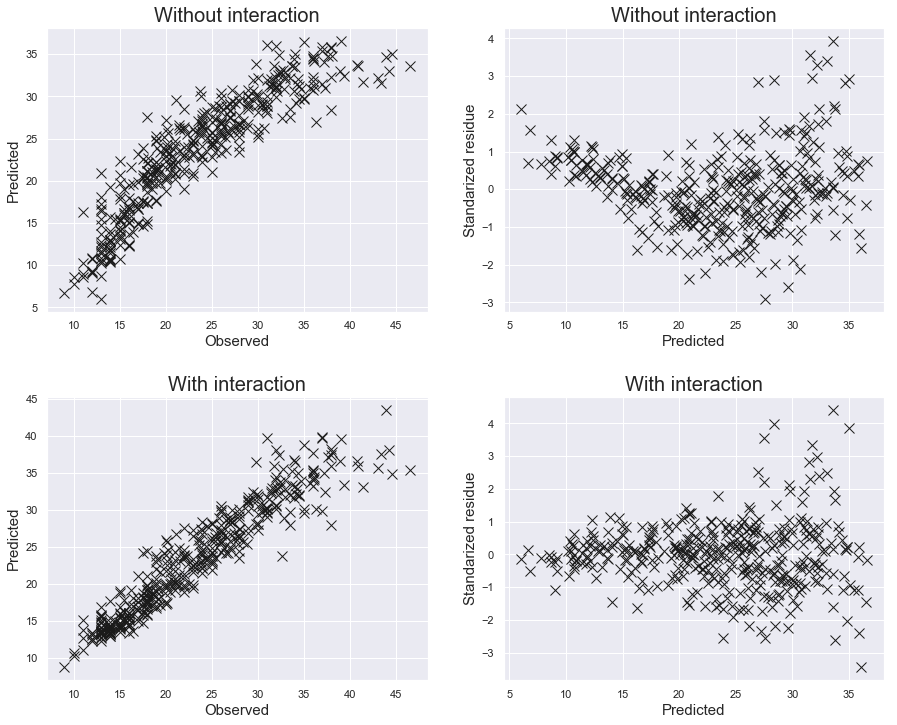

In [30]:
fig, ax = plt.subplots(2, 2, figsize = (15, 12))

ax[0, 0].plot(y, y_pred, 'kx', markersize = 10)
ax[0, 0].set_xlabel('Observed', size = 15)
ax[0, 0].set_ylabel('Predicted', size = 15)
ax[0, 0].set_title('Without interaction', size = 20)

ax[0, 1].plot(y_pred, (y - y_pred) / np.sqrt(mean_squared_error(y, y_pred)), 'kx', markersize = 10)
ax[0, 1].set_xlabel('Predicted', size = 15)
ax[0, 1].set_ylabel('Standarized residue', size = 15)
ax[0, 1].set_title('Without interaction', size = 20)

ax[1, 0].plot(y, y_pred_intrcn, 'kx', markersize = 10)
ax[1, 0].set_xlabel('Observed', size = 15)
ax[1, 0].set_ylabel('Predicted', size = 15)
ax[1, 0].set_title('With interaction', size = 20)

ax[1, 1].plot(y_pred, (y - y_pred_intrcn) / np.sqrt(mean_squared_error(y, y_pred_intrcn)), 'kx', markersize = 10)
ax[1, 1].set_xlabel('Predicted', size = 15)
ax[1, 1].set_ylabel('Standarized residue', size = 15)
ax[1, 1].set_title('With interaction', size = 20)

fig.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

From this we can see that the presence of the interaction makes the prediction more correlated to the observation values as already seen above in numbers. The standard residue also have been reduced on average. Which is good sign. However, all the interactions are not significant. So it the model selection is done properly the model with interaction can be better than the model without interaction. 